In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://cdn3.gnarususercontent.com.br/3137-data-visualization/Projeto/Dados/pib_br_2002_2020_estados.csv")
df.sample(5)

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
357,2017,RJ,Sudeste,671605668055,108118186566,563487481487,2926015454,104711661099,333966132184,121883672741
176,2007,CE,Nordeste,50818749012,6528933847,44289815168,2929835500,9522247227,21449457777,10388274664
354,2014,RJ,Sudeste,671076844311,91738016960,579338827353,2841308862,171683729092,301915183190,102898606221
61,2006,RR,Norte,3802452111,291326739,3511125372,92281423,481265053,1201350258,1736228641
395,2017,PR,Sul,421497870228,55469453738,366028416488,34454306960,92835937761,186215668484,52522503283


    
    Como está disposto o PIB nos estados brasileiros no ano de 2020? É possível notar os estados com maior e menor participação no PIB nacional?

In [3]:
# df.query("ano == 2020").set_index("sigla_uf").sort_values(by="pib", ascending=False)[["pib"]]
df_2020 = df.query("ano == 2020").set_index("sigla_uf").sort_values(by="pib", ascending=False)[["pib"]].copy()
df_2020.head()  

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


array([<Axes: >], dtype=object)

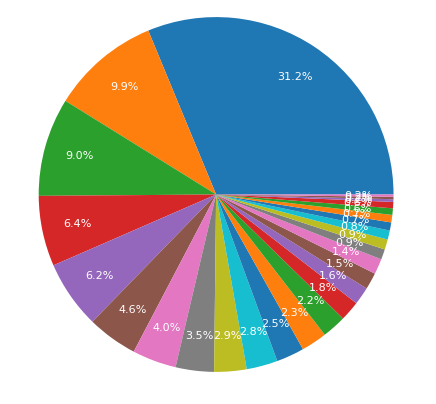

In [4]:
df_2020.plot(
    kind="pie",
    subplots=True,
    legend=False,
    autopct="%.1f%%",
    radius=1.2,
    ylabel="",
    xlabel="",
    textprops=dict(color="white", size=8),
    pctdistance=0.8,
    colors=sns.color_palette("tab10"),
)

Muitas categorias não são comportadas em gráficos de barras! 

__Comparando PIB por região: 2002 e 2020__



In [5]:
# PIB por regiao.
df_2002 = df.query("ano == 2002")[["pib", "regiao"]].groupby(by="regiao").sum().sort_values(by="pib", ascending=False).copy()
df_2020 = df.query("ano == 2020")[["pib", "regiao"]].groupby(by="regiao").sum().sort_values(by="pib", ascending=False).copy()


In [6]:
display(df_2002.T, df_2020.T)

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
pib,854309793369,241564819092,194847656440,128162640832,69902366306


regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
pib,3952694729239,1308147455374,1079331030689,791250735824,478173048893


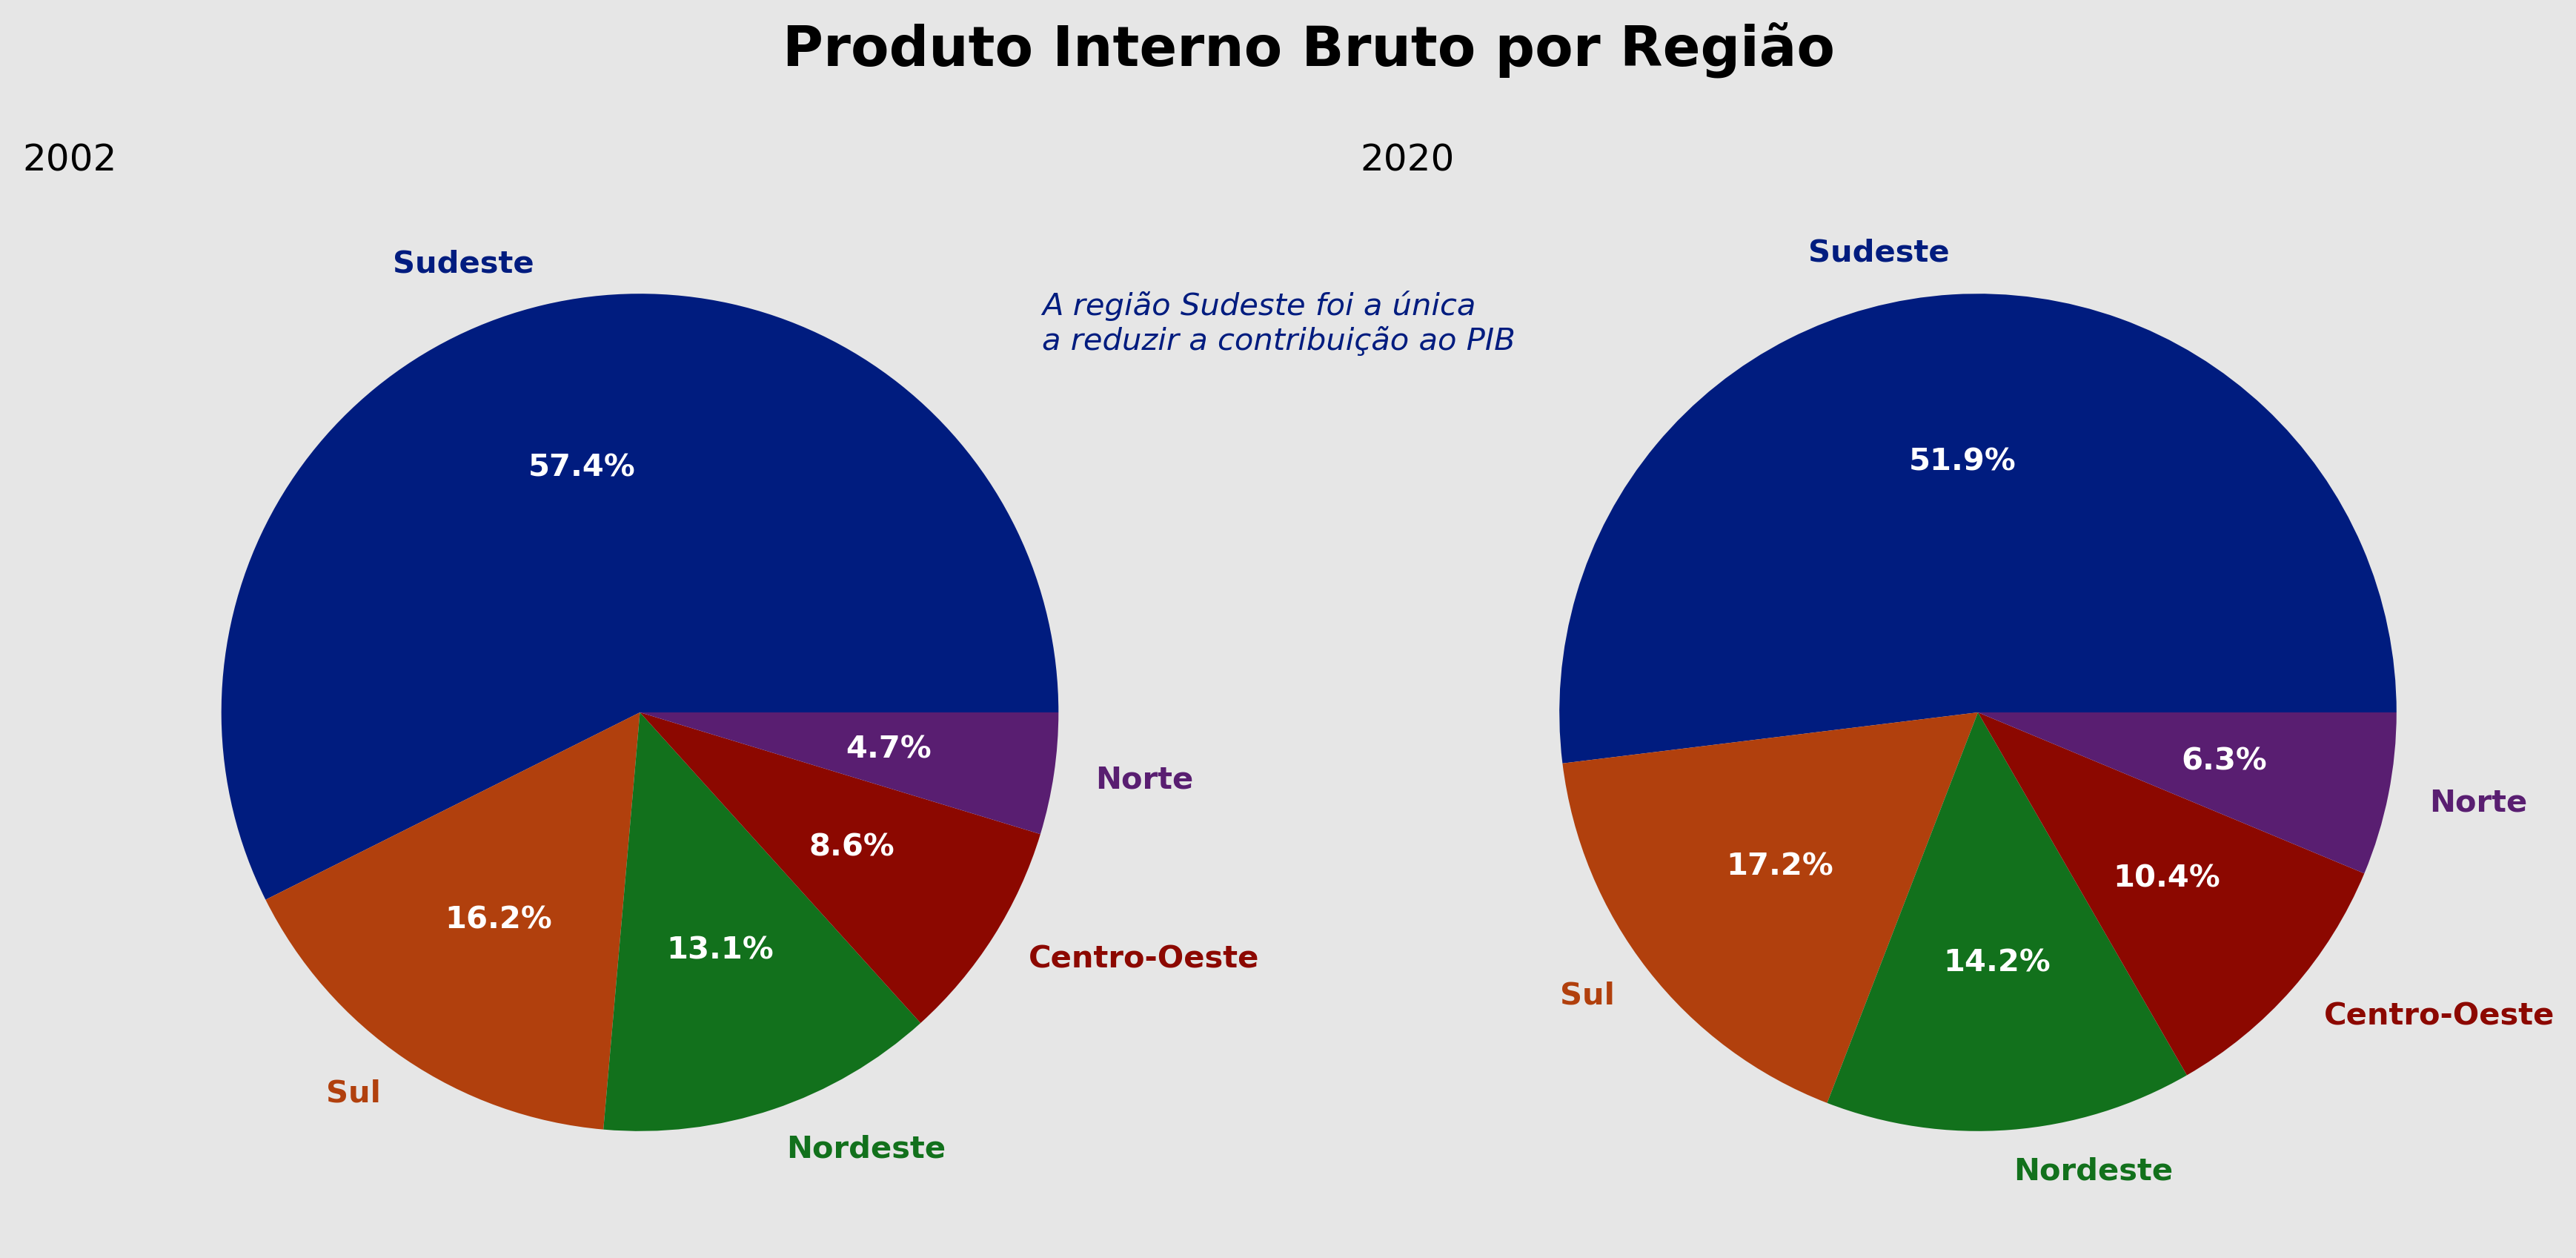

In [29]:
sns.set_palette(sns.color_palette("dark"))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), dpi=300, layout="constrained")
fig.suptitle("Produto Interno Bruto por Região", y=1.1, size=18, fontweight="bold")
fig.set_facecolor("#E6E6E6")
# ---
# 2002
ax1.set_title("2002", loc="left", ha="right")
ax1.set_facecolor("black")
patch_list, texts, autotexts = ax1.pie(
    data=df_2002, x="pib", labels=df_2002.index, autopct="%.1f%%"
)

for i, text in enumerate(texts):
    text.set_color(patch_list[i].get_facecolor())
    text.set_weight("bold")

for text in autotexts:
    text.set_color("white")
    text.set_weight("bold")

# ---
# 2020
ax2.set_title("2020", loc="left", ha="right")
patch_list, texts, autotexts = ax2.pie(
    data=df_2020, x="pib", labels=df_2020.index, autopct="%.1f%%"
)

for i, text in enumerate(texts):
    text.set_color(patch_list[i].get_facecolor())
    text.set_weight("bold")

for text in autotexts:
    text.set_color("white")
    text.set_weight("bold")        

fontdict = dict(style="italic", color="#001c7f")
texto_central = "A região Sudeste foi a única\na reduzir a contribuição ao PIB"
fig.text(x=0.4 ,y=0.8, s=texto_central, ha="left", va="bottom", fontdict=fontdict)

plt.show()    
